In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.5.0


In [ ]:
#set the seed
from numpy.random import seed
seed(1)

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#create an array to access the class name based on label number.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(len(train_images),len(test_images))

60000 10000


In [ ]:
#Check shape of training image
train_images[0].shape

(28, 28)

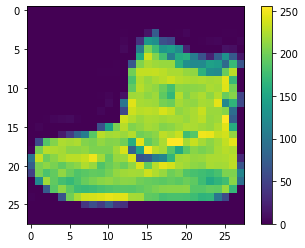

In [ ]:
#check the range of pixel values
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

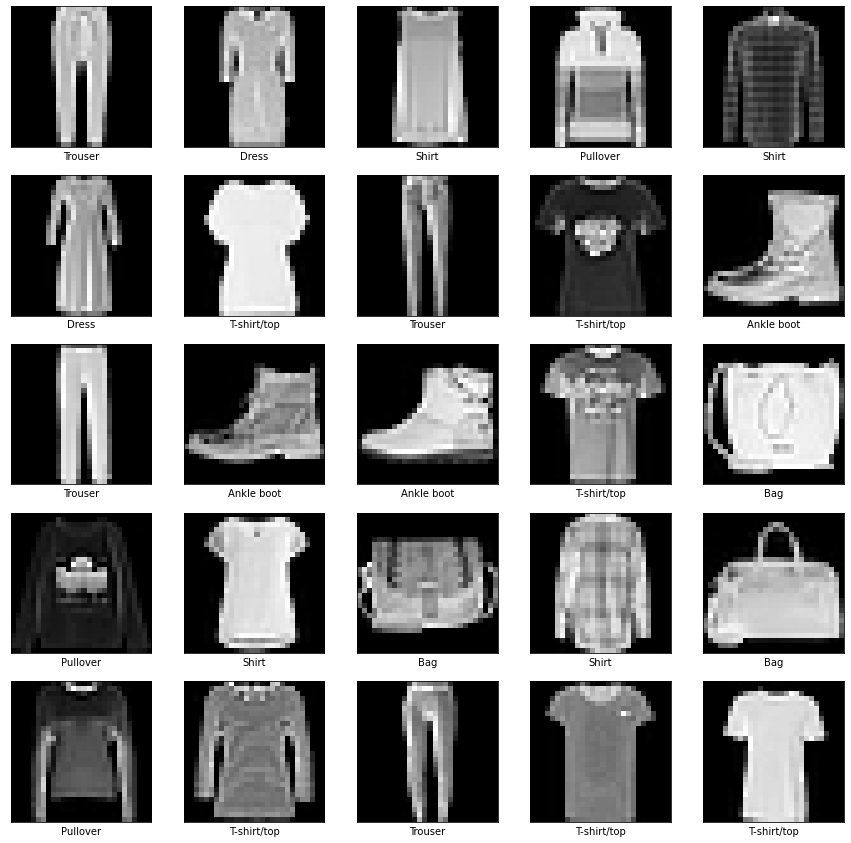

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(train_images))
  plt.imshow(train_images[rand_no], cmap='gray')
  plt.xlabel(class_names[train_labels[rand_no]])

In [ ]:
#Normalizing the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

def create_model():
  model = Sequential()
  #input layer size is 784 after flattening
  model.add(Flatten(input_shape=(28, 28)))
  #hidden layer with 512 neurons
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model = create_model()
model.summary()
model.compile(optimizer='adam',
loss=SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystopping_callback = EarlyStopping(
monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
baseline=None, restore_best_weights=True
)
#modelcheckpoint_callback = ModelCheckPoint('best_model.hdf5',monitor='val_loss', verbose=0, mode='auto',save_best_only=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x=train_images,
y=train_labels,
epochs=20,
validation_split=0.2,
callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1500/1500 [==============================] - 10s 6ms/step - loss: 0.4959 - accuracy: 0.8235 - val_loss: 0.4021 - val_accuracy: 0.8546
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3728 - accuracy: 0.8626 - val_loss: 0.3674 - val_accuracy: 0.8650
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3292 - accuracy: 0.8788 - val_loss: 0.3395 - val_accuracy: 0.8786
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3049 - accuracy: 0.8871 - val_loss: 0.3505 - val_accuracy: 0.8721
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2851 - accuracy: 0.8941 - val_loss: 0.3234 - val_accuracy: 0.8837
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2704 - accuracy: 0.8995 - val_loss: 0.3324 - val_accuracy: 0.8807
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2569 - accuracy: 0.9037 - val_loss: 0.3330 - val_accuracy: 0.8861
Ep

In [ ]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 187), started 0:00:35 ago. (Use '!kill 187' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 1s - loss: 0.3296 - accuracy: 0.8864

Test accuracy: 0.8863999843597412


In [ ]:
predictions = model.predict(test_images)


In [ ]:
predictions.shape


(10000, 10)

In [ ]:
class_names[np.argmax(predictions[189])]

'Sneaker'

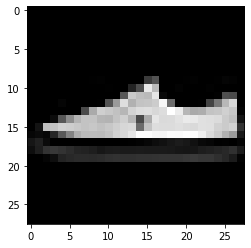

In [ ]:
plt.imshow(test_images[189],cmap='gray')

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
  100*np.max(predictions_array),
  class_names[true_label]),
  color=color)

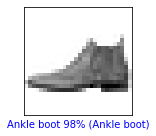

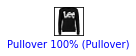

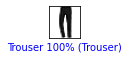

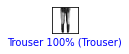

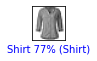

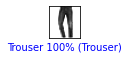

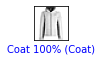

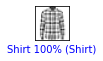

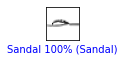

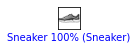

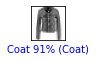

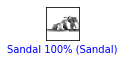

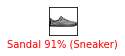

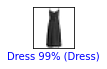

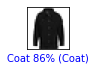

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(5, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.tight_layout()
  plt.show()

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
#Loading the model from saved location
loaded_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
